In [50]:
import random
import pandas as pd
import json
import numpy as np
import scipy.sparse as sp
import time
from collections import defaultdict

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rc
rc('figure', figsize=(16, 8), max_open_warning=False)

from surprise import SVD
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

import sys
sys.path.insert(0, '../src')

import preprocess
import evaluation

In [51]:
random_dict = preprocess.create_random_subset_paper_paper_data(debug=True)
# random_dict = preprocess.create_paper_paper_dict(debug=True)

In [38]:
len(random_dict)

2556

In [39]:
def invert_dict(d): 
    inverse = dict() 
    for key in d: 
        # Go through the list that is saved in the dict:
        for item in d[key]:
            # Check if in the inverted dict the key exists
            if item not in inverse: 
                # If not create a new list
                inverse[item] = [key] 
            else: 
                inverse[item].append(key) 
    return inverse

In [40]:
invert_random_dict = invert_dict(random_dict)

In [41]:
testdic  = defaultdict(list)
traindic = defaultdict(list)

for user in random_dict:
    if len(random_dict[user]) < 2:
        traindic[user] = random_dict[user]
    else:
        i = 0
        for ref in random_dict[user]:
            i = i+1
            if i < 2:
                traindic[user].append(ref)
            else:
                if len(invert_random_dict[ref]) < 2:
                    traindic[user].append(ref)
                else:
                    invert_random_dict[ref].remove(user)
                    testdic[user].append(ref)
                

In [42]:
trainset  = preprocess.create_surprise_paper_paper_data(traindic).build_full_trainset()
testset   = preprocess.create_surprise_paper_paper_data(testdic).build_full_trainset().build_testset()

In [43]:
aux  = trainset.build_testset()
print(len(aux))
print(len(testset))
print(len(testset)/(len(aux)+len(testset)))

2937
186
0.059558117195004805


In [44]:
algo = SVD(biased=False, n_epochs = 10)
algo.fit(trainset)


In [45]:
predictions = algo.test(testset, clip=False)
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
print(len(df))
print(len(df[df.details == {'was_impossible': False}]))

186
186


In [46]:
df

,uid,iid,rui,est,details
0,9753c508-20e1-4f9b-baf4-f0c49008dcbc,d578fe46-9b3d-4425-8e2b-a2aac2170b06,1.0,-0.951072,{'was_impossible': False}
1,f1dede99-ff4e-4e9a-8950-2f91c9c02f6a,5e7b1c2c-baaf-466d-be01-c075002bf1fb,1.0,-0.928313,{'was_impossible': False}
2,f1dede99-ff4e-4e9a-8950-2f91c9c02f6a,e8cbffc8-d292-4d4b-ae22-f96c645e4461,1.0,-1.027606,{'was_impossible': False}
3,ed43ebb5-f6c4-4a3e-9ea3-8e5c17de7178,8188df0c-955f-4fef-961d-c67ae2ee3799,1.0,-1.067729,{'was_impossible': False}
4,5d98c64a-c521-41f7-95f9-eb07a4c40196,f967618b-e047-43a9-bea8-44b9e74d708f,1.0,-0.878784,{'was_impossible': False}
5,2ced1d5a-a5ff-4860-99d2-9832b11b1f40,978efa8a-b62a-4e76-a2a1-c3a7af5e1a60,1.0,-0.891885,{'was_impossible': False}
6,c59e69d0-32bb-416c-aed2-3211aa5ceb30,71f4c930-83fe-4cf2-b895-264d716e02b2,1.0,-0.797129,{'was_impossible': False}
7,b2336fd0-40a2-4c1f-9c4b-fcbfd5c68ac4,d35738a8-0c5f-4788-bbcc-ef55a504be78,1.0,-1.057219,{'was_impossible': False}
8,c4161e2c-84c1-4b71-a63a-33230f5ebce9,70f4dcf0-2784-4627-899c-1463988a3f52,1.0,-1.085298,{'was_impossible': False}
9,d9194ae3-7fa8-4c1c-a681-d1bac8050fa7,3662e5bc-d634-43c2-90fe-f18ebd3033f4,1.0,-0.978106,{'was_impossible': False}


In [47]:
# Visualize train set data
usernum = trainset.n_users
itemnum = trainset.n_items

papermat = sp.dok_matrix((usernum,itemnum), dtype=np.int8)
for i in range(trainset.n_users):
    for paper_id in trainset.ur[i]:
        papermat[i, paper_id[0]] = 1

In [48]:
# Visualize test set data
for j in range(len(testset)):
    uid    = testset[j][0]
    iid    = testset[j][1]
    rating = testset[j][2]
    try:
        iuid = algo.trainset.to_inner_uid(uid)
    except:
        continue
    try:
        iiid = algo.trainset.to_inner_iid(iid)
    except:
        continue
    papermat[iuid, iiid] = -1

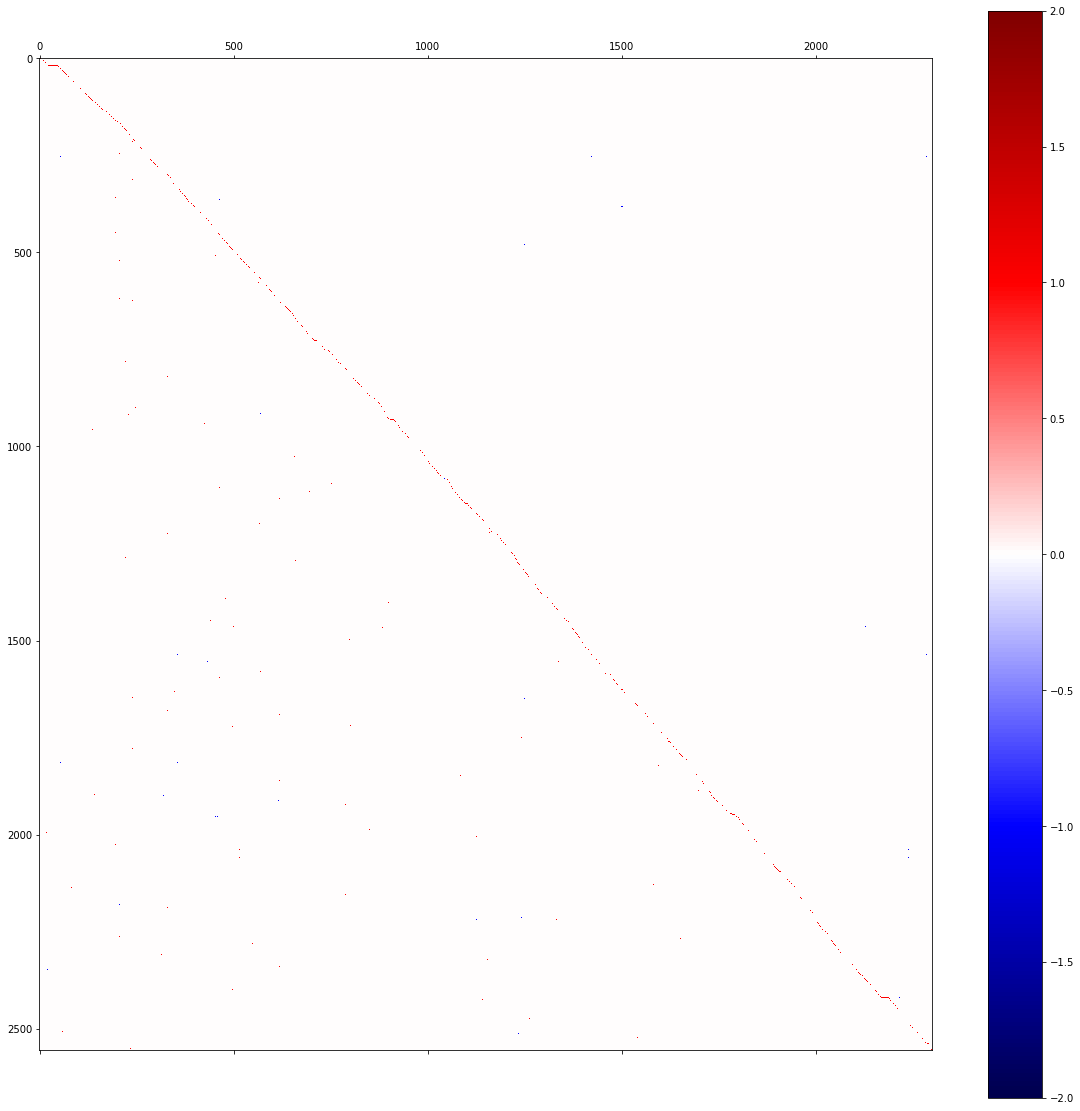

In [49]:
A = papermat.todense()
fig, axes = plt.subplots(figsize=(20, 20))
pos = axes.matshow(A, cmap='seismic',vmin=-2., vmax=2.)
fig.colorbar(pos)